In [1]:
# Import the dependencis.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to the a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determin city based on latitude and longitude
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [10]:
# Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("____________________________")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url +"&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
____________________________
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | bloemfontein
Processing Record 5 of Set 1 | morant bay
Processing Record 6 of Set 1 | jabiru
City not found. Skipping...
Processing Record 7 of Set 1 | mekhe
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | egvekinot
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | lompoc
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | the valley
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | bandarbeyla
Processing Record 21 of Set 1 | aksu
Processing Record 22 of Set 1 | victor

Processing Record 33 of Set 4 | shahrud
Processing Record 34 of Set 4 | culipapa
City not found. Skipping...
Processing Record 35 of Set 4 | vanimo
Processing Record 36 of Set 4 | liverpool
Processing Record 37 of Set 4 | airai
Processing Record 38 of Set 4 | ribeira grande
Processing Record 39 of Set 4 | saleaula
City not found. Skipping...
Processing Record 40 of Set 4 | berlevag
Processing Record 41 of Set 4 | san policarpo
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | aguimes
Processing Record 44 of Set 4 | jiuquan
Processing Record 45 of Set 4 | makakilo city
Processing Record 46 of Set 4 | omboue
Processing Record 47 of Set 4 | los llanos de aridane
Processing Record 48 of Set 4 | nemuro
Processing Record 49 of Set 4 | ahipara
Processing Record 50 of Set 4 | kongwa
Processing Record 1 of Set 5 | khuzhir
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | haines junction
Processing Record 4 of Set 5 | montepuez
Processing Record 5 o

Processing Record 21 of Set 8 | valdivia
Processing Record 22 of Set 8 | manakara
Processing Record 23 of Set 8 | mvuma
Processing Record 24 of Set 8 | boguchany
Processing Record 25 of Set 8 | goryachegorsk
Processing Record 26 of Set 8 | kumla
Processing Record 27 of Set 8 | chiman
Processing Record 28 of Set 8 | tateyama
Processing Record 29 of Set 8 | calama
Processing Record 30 of Set 8 | byron bay
Processing Record 31 of Set 8 | richards bay
Processing Record 32 of Set 8 | maragogi
Processing Record 33 of Set 8 | fairbanks
Processing Record 34 of Set 8 | rungata
City not found. Skipping...
Processing Record 35 of Set 8 | norman wells
Processing Record 36 of Set 8 | abha
Processing Record 37 of Set 8 | payakumbuh
Processing Record 38 of Set 8 | maniitsoq
Processing Record 39 of Set 8 | san isidro
Processing Record 40 of Set 8 | praia da vitoria
Processing Record 41 of Set 8 | igarka
Processing Record 42 of Set 8 | lipovtsy
Processing Record 43 of Set 8 | belmopan
Processing Record

Processing Record 14 of Set 12 | lodja
Processing Record 15 of Set 12 | dingle
Processing Record 16 of Set 12 | alice springs
Processing Record 17 of Set 12 | eyl
Processing Record 18 of Set 12 | beinamar
Processing Record 19 of Set 12 | yeniseysk
Processing Record 20 of Set 12 | kyren
Processing Record 21 of Set 12 | sedro-woolley
Processing Record 22 of Set 12 | ziro
Processing Record 23 of Set 12 | mergui
City not found. Skipping...
Processing Record 24 of Set 12 | mangan
Processing Record 25 of Set 12 | kalmunai
Processing Record 26 of Set 12 | bayevo
Processing Record 27 of Set 12 | mattawa
Processing Record 28 of Set 12 | canchungo
Processing Record 29 of Set 12 | kerrobert
Processing Record 30 of Set 12 | yunhe
Processing Record 31 of Set 12 | guarapari
Processing Record 32 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 33 of Set 12 | kapustin yar-1
City not found. Skipping...
Processing Record 34 of Set 12 | marzuq
Processing Record 35 of Set 12 | treinta

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Touros,-5.1989,-35.4608,85.10,69,27,12.75,BR,2021-10-10 19:58:49
1,Yellowknife,62.4560,-114.3525,38.41,99,90,11.50,CA,2021-10-10 19:58:49
2,Rikitea,-23.1203,-134.9692,74.64,81,95,18.81,PF,2021-10-10 19:58:50
3,Bloemfontein,-29.1211,26.2140,60.28,41,0,9.22,ZA,2021-10-10 19:58:50
4,Morant Bay,17.8815,-76.4093,87.62,65,26,6.67,JM,2021-10-10 19:58:50


In [13]:
# Reoder the columns of the DataFrame

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Touros,BR,2021-10-10 19:58:49,-5.1989,-35.4608,85.10,69,27,12.75
1,Yellowknife,CA,2021-10-10 19:58:49,62.4560,-114.3525,38.41,99,90,11.50
2,Rikitea,PF,2021-10-10 19:58:50,-23.1203,-134.9692,74.64,81,95,18.81
3,Bloemfontein,ZA,2021-10-10 19:58:50,-29.1211,26.2140,60.28,41,0,9.22
4,Morant Bay,JM,2021-10-10 19:58:50,17.8815,-76.4093,87.62,65,26,6.67
...,...,...,...,...,...,...,...,...,...
568,Aden,YE,2021-10-10 20:00:05,12.7794,45.0367,87.55,67,95,2.28
569,Grand-Santi,GF,2021-10-10 20:01:08,4.2500,-54.3833,88.47,53,100,2.80
570,Cortez,US,2021-10-10 20:01:49,37.3489,-108.5859,67.42,39,0,22.12
571,Kochi,IN,2021-10-10 20:01:49,9.9399,76.2602,76.98,88,100,3.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# # Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


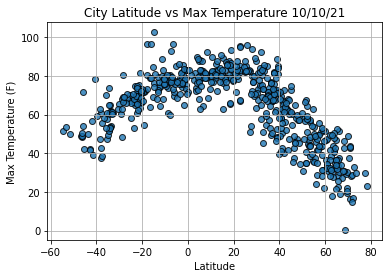

In [16]:
# Import the time module
import time

# Build the scater plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths =1, marker= "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

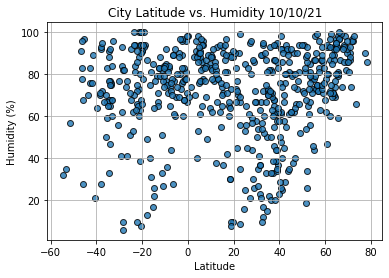

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

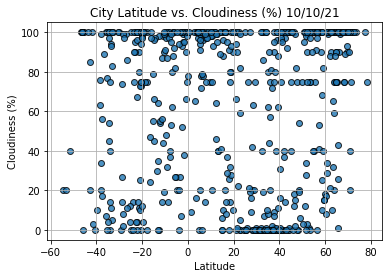

In [18]:
# Build the scatter plots for latitude vs.cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths=1, marker="o", 
           alpha= 0.8, label = "Cities")

# Incorprate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

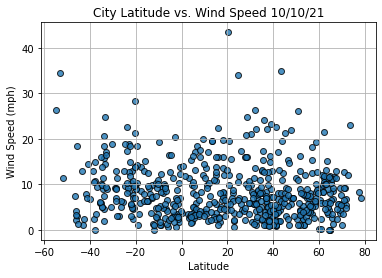

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()